In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [155]:
df = pd.read_csv("health_data.csv")
df.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [156]:
# 필요 없는 데이터 삭제
df.drop(["기준년도", "가입자일련번호", "시도코드", "데이터공개일자"], axis=1, inplace=True)

In [157]:
# 결측치 수
df.isnull().sum()

성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
dtype: int64

In [158]:
# 데이터 전처리

# 결측값을 최빈값으로 대체
for column in df.columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# 성별 인코딩
df["성별코드"].replace("M", 0, inplace=True)
df["성별코드"].replace("F", 1, inplace=True)

# 흡연상태 인코딩
df["흡연상태"].replace("No", 0, inplace=True)
df["흡연상태"].replace("NotNow", 1, inplace=True)
df["흡연상태"].replace("Yes", 2, inplace=True)

# 음주여부 인코딩
df["음주여부"].replace("No", 0, inplace=True)
df["음주여부"].replace("Yes", 1, inplace=True)

# BMI 파생변수 생성
df["BMI"] = df["체중(5Kg 단위)"]/((df["신장(5Cm단위)"]/100)**2)

In [159]:
df.head()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,BMI
0,0,9,165,60,72.1,1.2,1.5,1,1,127.0,...,1.1,21.0,27.0,21.0,0,0,0,0.0,1.0,22.038567
1,1,13,150,65,81.0,0.8,0.8,1,1,110.0,...,0.5,18.0,15.0,15.0,0,0,0,0.0,1.0,28.888889
2,1,12,155,55,70.0,0.6,0.7,1,1,123.0,...,0.7,27.0,25.0,7.0,0,0,0,0.0,1.0,22.892820
3,0,13,160,70,90.8,1.0,1.0,1,2,134.0,...,1.2,65.0,97.0,72.0,0,0,1,0.0,0.0,27.343750
4,1,12,155,50,75.2,1.5,1.2,1,1,144.0,...,0.7,18.0,17.0,14.0,0,0,0,0.0,1.0,20.811655


In [160]:
# 결측치가 너무 많았던 행은 제거
data = df.drop(["총콜레스테롤", "트리글리세라이드", "HDL콜레스테롤", "LDL콜레스테롤"], axis=1)

# 음주 여부를 제외한 특성들을 독립변수로, 음주 여부를 종속변수로 설정하여 분류 테스트
x_data = data.drop("음주여부", axis=1)
y_data = data["음주여부"]

# 훈련 데이터, 테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)

print(x_train.shape)
print(x_test.shape)

(8000, 23)
(2000, 23)


In [161]:
# 다양한 모델의 분류 결과 확인

model1 = LogisticRegression()
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)
print("model1 accuracy :", accuracy_score(y_test, pred1))

model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
print("model2 accuracy :", accuracy_score(y_test, pred2))

model3 = GradientBoostingClassifier()
model3.fit(x_train, y_train)
pred3 = model3.predict(x_test)
print("model3 accuracy :", accuracy_score(y_test, pred3))

model1 accuracy : 0.7155


C:\Users\love9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model2 accuracy : 0.7055
model3 accuracy : 0.724


In [162]:
feature_importance = pd.DataFrame()
feature_importance["name"] = x_train.columns
feature_importance["importance"] = model3.feature_importances_
feature_importance

,name,importance
0,성별코드,0.147330
1,연령대코드(5세단위),0.353282
2,신장(5Cm단위),0.032758
3,체중(5Kg 단위),0.001950
4,허리둘레,0.010998
5,시력(좌),0.004212
6,시력(우),0.005746
7,청력(좌),0.000267
8,청력(우),0.001692
9,수축기혈압,0.013241


C:\Users\love9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


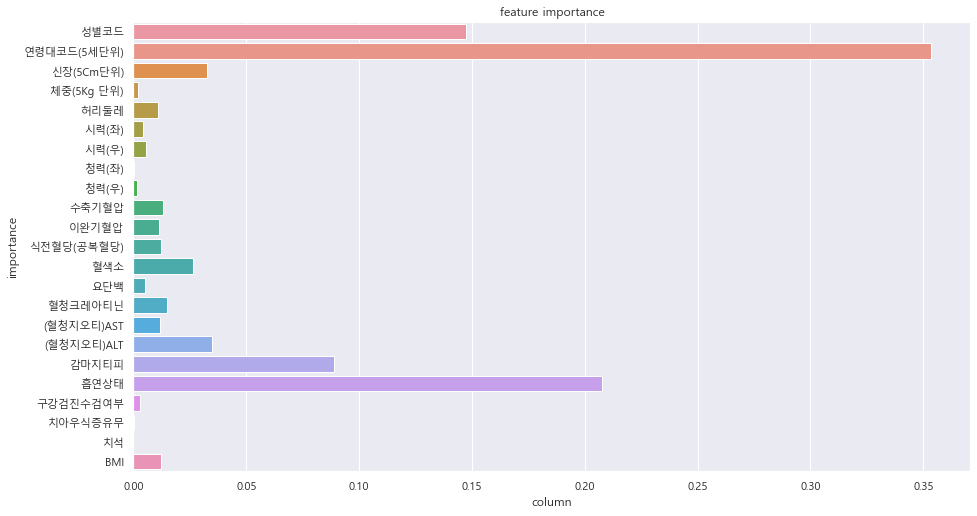

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.barplot(feature_importance["importance"], feature_importance["name"])
sns.set(rc={'figure.figsize':(15, 8.27)})
sns.set(font_scale=1)

plt.title("feature importance")
plt.xlabel("column")
plt.ylabel("importance")
plt.show()

### 특성 중요도 시각화 결과
* 분류 모델의 특성 중요도 출력 결과, 연령대 코드가 음주 여부에 가장 큰 영향을 미친 것을 알 수 있으며, 그 다음으로 흡연 상태와 성별 코드 순으로 영향을 미쳤음

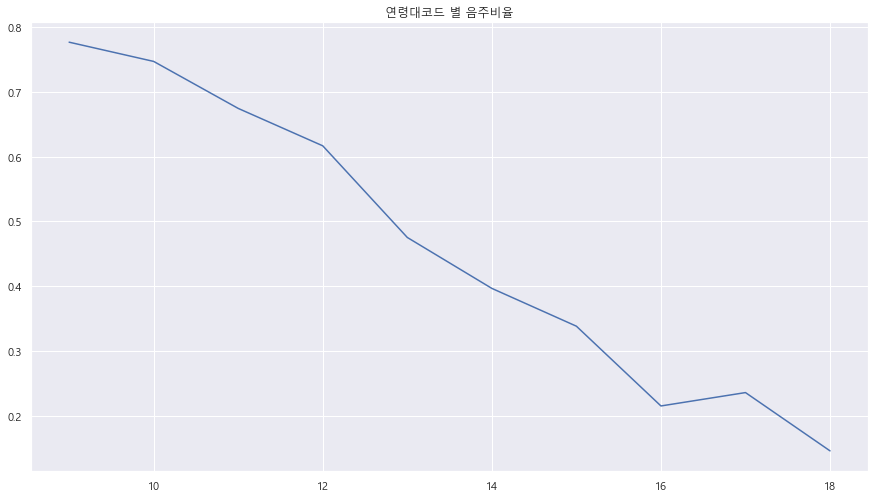

In [164]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 연령대코드 별 음주자
ratio_idx = []
ratio_list = []
for i in range(1, 19):
    drink = df[df["연령대코드(5세단위)"]==i]["음주여부"].value_counts()
    if len(drink) != 0:
        ratio = drink[1]
        ratio_idx.append(i)
        ratio_list.append(ratio/drink.sum())
plt.title("연령대코드 별 음주비율")
plt.plot(ratio_idx, ratio_list)
plt.show()

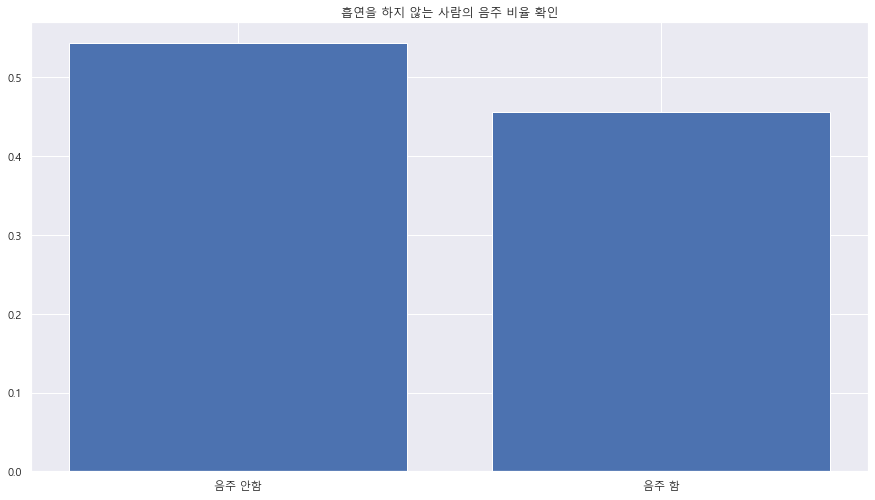

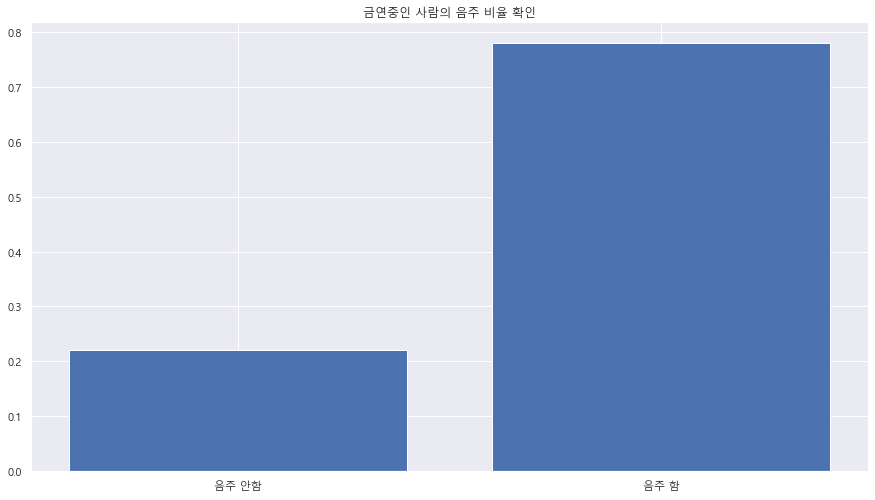

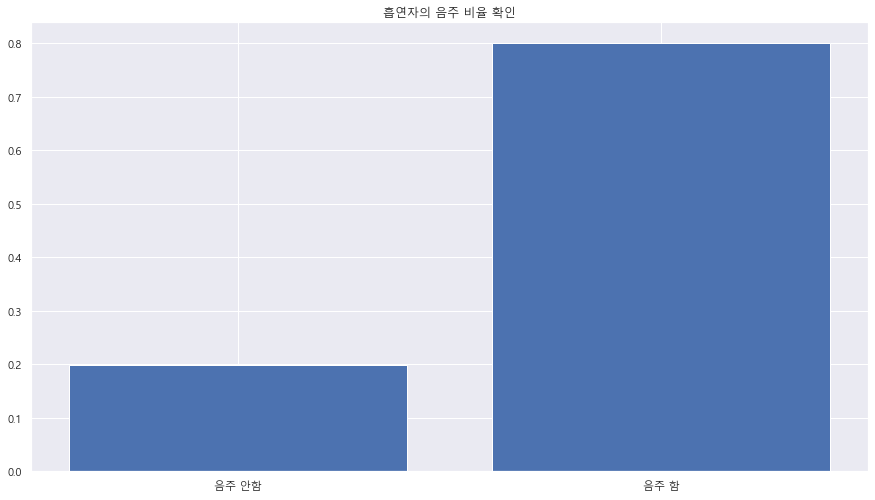

In [165]:
# 흡연 상태와 음주 여부 확인
ratio_list = []
smoke = df[df["흡연상태"]==0]["음주여부"].value_counts()
for i in range(2):
    ratio_list.append(smoke[i]/smoke.sum())

plt.title("흡연을 하지 않는 사람의 음주 비율 확인")
plt.bar(["음주 안함", "음주 함"], ratio_list)
plt.show()

ratio_list = []
smoke = df[df["흡연상태"]==1]["음주여부"].value_counts()
for i in range(2):
    ratio_list.append(smoke[i]/smoke.sum())

plt.title("금연중인 사람의 음주 비율 확인")
plt.bar(["음주 안함", "음주 함"], ratio_list)
plt.show()

ratio_list = []
smoke = df[df["흡연상태"]==2]["음주여부"].value_counts()
for i in range(2):
    ratio_list.append(smoke[i]/smoke.sum())

plt.title("흡연자의 음주 비율 확인")
plt.bar(["음주 안함", "음주 함"], ratio_list)
plt.show()

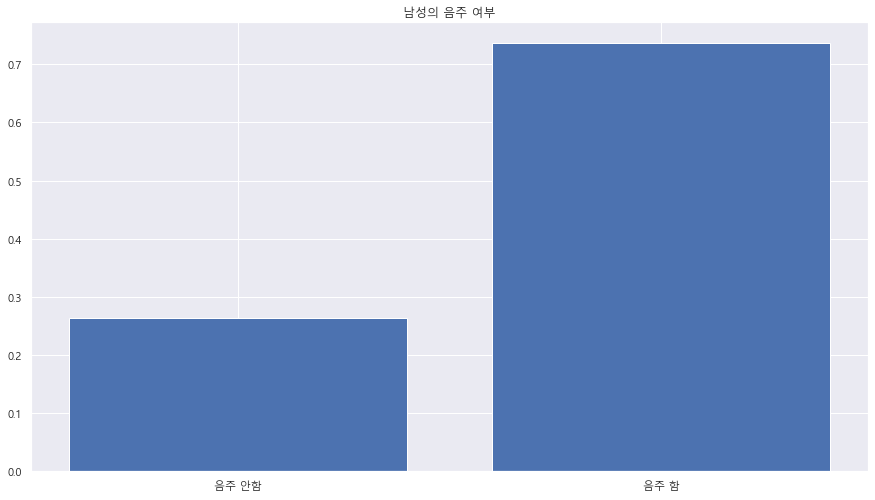

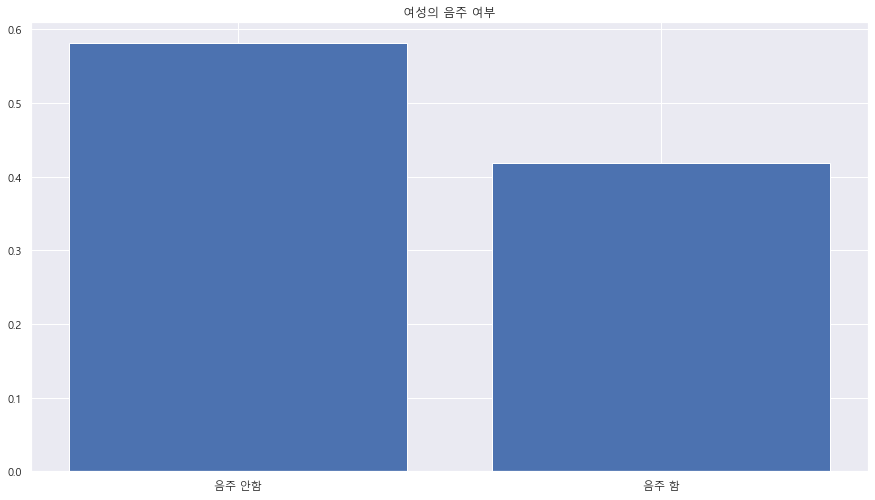

In [166]:
# 성별에 따른 음주 여부 확인
ratio_list = []
smoke = df[df["성별코드"]==0]["음주여부"].value_counts()
for i in range(2):
    ratio_list.append(smoke[i]/smoke.sum())

plt.title("남성의 음주 여부")
plt.bar(["음주 안함", "음주 함"], ratio_list)
plt.show()

ratio_list = []
smoke = df[df["성별코드"]==1]["음주여부"].value_counts()
for i in range(2):
    ratio_list.append(smoke[i]/smoke.sum())

plt.title("여성의 음주 여부")
plt.bar(["음주 안함", "음주 함"], ratio_list)
plt.show()

